In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# from scipy import stats
# from scipy.stats import binom, norm

plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')
np.random.seed(42)
%matplotlib inline

In [2]:
df = pd.read_csv('../datasets/customer_churn.csv', delimiter=',', encoding='utf-8')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   str    
 1   gender            7043 non-null   str    
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   str    
 4   Dependents        7043 non-null   str    
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   str    
 7   MultipleLines     7043 non-null   str    
 8   InternetService   7043 non-null   str    
 9   OnlineSecurity    7043 non-null   str    
 10  OnlineBackup      7043 non-null   str    
 11  DeviceProtection  7043 non-null   str    
 12  TechSupport       7043 non-null   str    
 13  StreamingTV       7043 non-null   str    
 14  StreamingMovies   7043 non-null   str    
 15  Contract          7043 non-null   str    
 16  PaperlessBilling  7043 non-null   str    
 17  Paymen

In [4]:
# смотрим, какие можно привести к числовому формату или категории

for col in df.columns[1:]:
    if len(df[col].unique()) == 2:
        print(f'{col}:',* df[col].unique())


gender: Female Male
SeniorCitizen: 0 1
Partner: Yes No
Dependents: No Yes
PhoneService: No Yes
PaperlessBilling: Yes No
Churn: No Yes


In [ ]:
# приводим к числовому формату, убрав пробелы для точного совпадения
mapping = {'Yes': 1, 'No': 0}
for col in ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']:
    df[col] = df[col].apply(lambda x: x.strip()).map(mapping)

df['TotalCharges'] = df['TotalCharges'].apply(lambda x: x.strip()).apply(lambda x: float(x) if x else 0.0)

In [6]:
# приводим к типу categories, чтобы экономить память
types = {i: 'category' for i in ['gender',
                                 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
                                 'DeviceProtection', 'TechSupport', 'StreamingTV',
                                 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']}
df = df.astype(types)


In [7]:
print(*sorted(df['tenure'].unique())) # смотрим, какие у нас значения в столбце


0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72


In [8]:
# разбиваем категории
df['tenure_groups'] = pd.cut(df['tenure'], 15)
df['MonthlyCharges_groups'] = pd.cut(df['MonthlyCharges'], 15)


In [9]:
# приводим категории к красивому виду
df['tenure_groups'] = df.groupby('tenure_groups')['tenure'] \
    .transform(lambda x: f"{int(x.min())}-{int(x.max())}")
df['tenure_groups'].unique()

<StringArray>
[  '0-4', '34-38', '44-48',   '5-9', '20-24', '10-14', '25-28', '58-62',
 '15-19', '49-52', '68-72', '29-33', '63-67', '39-43', '53-57']
Length: 15, dtype: str

In [ ]:
# значения стали числовыми и потому при сортировке будут отображаться неверно. задаем им верный порядок
df['tenure_groups'] = df['tenure_groups'].replace({'5-9': '05-09'})
custom_order = ['0-4', '05-09', '10-14', '15-19', '20-24', '25-28', '29-33',
                '34-38', '39-43', '44-48', '49-52', '53-57', '58-62', '63-67', '68-72']

# Преобразование в категориальный тип с заданным порядком
df['tenure_groups'] = pd.Categorical(df['tenure_groups'], categories=custom_order, ordered=True)

# Теперь при группировке или value_counts() будет нужный порядок
print(df['tenure_groups'].value_counts().sort_index())

tenure_groups
0-4      1238
05-09     616
10-14     517
15-19     436
20-24     403
25-28     287
29-33     342
34-38     327
39-43     320
44-48     318
49-52     282
53-57     347
58-62     349
63-67     415
68-72     846
Name: count, dtype: int64


In [ ]:
# приводим категории ежемесячных расходов к красивому виду
df['MonthlyCharges_groups'] = df.groupby('MonthlyCharges_groups')['MonthlyCharges'] \
    .transform(lambda x: f"{int(x.min())}-{int(x.max())}")
df['MonthlyCharges_groups'].unique()

<StringArray>
[  '25-31',   '51-58',   '38-45',   '65-71',  '98-105',   '85-91',   '45-51',
   '18-24', '105-111', '112-118',   '58-65',   '92-98',   '71-78',   '78-85',
   '33-38']
Length: 15, dtype: str

In [ ]:
# Смотрим комбинацию возраста и типа контракта
age_contract = pd.crosstab(
    [df['SeniorCitizen'], df['Contract']],
    df['Churn'],
    normalize='index'
) * 100

print("Отток по возрасту и типу контракта (%):")
print(age_contract[1].unstack().round(1))

Отток по возрасту и типу контракта (%):
Contract       Month-to-month  One year  Two year
SeniorCitizen                                    
0                        39.6      10.7       2.7
1                        54.6      15.3       4.1


In [ ]:
age_payment = pd.crosstab(
    [df['SeniorCitizen'], df['PaymentMethod']],
    df['Churn'],
    normalize='index'
) * 100

print("\nОтток по возрасту и способу оплаты (%):")
print(age_payment[1].unstack().round(1))


Отток по возрасту и способу оплаты (%):
PaymentMethod  Bank transfer (automatic)  Credit card (automatic)  \
SeniorCitizen                                                       
0                                   15.6                     13.1   
1                                   22.7                     28.1   

PaymentMethod  Electronic check  Mailed check  
SeniorCitizen                                  
0                          42.6          17.4  
1                          53.4          46.8  


In [ ]:
age_tenure = pd.crosstab(
    [df['SeniorCitizen'], df['tenure_groups']],
    df['Churn'],
    normalize='index'
) * 100

print("\nОтток по возрасту и длительности подписки (%):")
print(age_tenure[1].unstack().round(1))


Отток по возрасту и длительности подписки (%):
tenure_groups   0-4  05-09  10-14  15-19  20-24  25-28  29-33  34-38  39-43  \
SeniorCitizen                                                                 
0              51.3   36.2   30.4   26.2   20.6   15.3   19.6   16.4   16.8   
1              76.1   56.0   57.1   54.3   42.6   51.9   38.0   36.2   51.1   

tenure_groups  44-48  49-52  53-57  58-62  63-67  68-72  
SeniorCitizen                                            
0               11.3   11.9   13.3   10.0    8.6    4.1  
1               32.1   27.7   25.0   16.0   14.1    8.5  


In [43]:
# Какие услуги чаще/реже используют пожилые
services = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
            'TechSupport', 'StreamingTV', 'StreamingMovies', 'PhoneService']

print("Процент подключения услуг по возрастным группам:")
for service in services:
    usage = pd.crosstab(
        df['SeniorCitizen'],
        df[service],
        normalize='index'
    ) * 100
    print(f"\n{service}:")
    print(usage.round(1))

Процент подключения услуг по возрастным группам:

OnlineSecurity:
OnlineSecurity    No  No internet service   Yes
SeniorCitizen                                  
0               45.6                 25.0  29.4
1               70.8                  4.6  24.7

OnlineBackup:
OnlineBackup     No  No internet service   Yes
SeniorCitizen                                 
0              41.9                 25.0  33.1
1              53.8                  4.6  41.7

DeviceProtection:
DeviceProtection    No  No internet service   Yes
SeniorCitizen                                    
0                 41.9                 25.0  33.1
1                 54.6                  4.6  40.8

TechSupport:
TechSupport      No  No internet service   Yes
SeniorCitizen                                 
0              44.8                 25.0  30.2
1              72.7                  4.6  22.8

StreamingTV:
StreamingTV      No  No internet service   Yes
SeniorCitizen                                 
0         

Мы видим, что график будет перегружен за счет поля 'no internet service', показатель которого везде одинаков. Нужно преобразовать данные так, чтобы они не влияли на подсчет долей.
Для начала проверим, правильно ли у нас указаны данные и 'no internet service' стоит одинаково во всех колонках с услугами и согласуется с информацией об интернет-сетях

In [30]:
service_check = df[['InternetService', 'OnlineSecurity', 'OnlineBackup',
                    'DeviceProtection', 'TechSupport', 'StreamingTV',
                    'StreamingMovies']].copy()
total = 0
for service in ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                'TechSupport', 'StreamingTV', 'StreamingMovies']:

    # Находим строки, где InternetService='No' но услуга не 'No internet service'
    mask = (service_check['InternetService'] == 'No') & \
           (service_check[service] != 'No internet service')
    no_service = mask.sum()
    if no_service > 0:
        print(f"в сервисе {service} найдено {no_service} несоответствий")
    total += no_service
print(f"всего найдено {total} несоответствий")


всего найдено 0 несоответствий


Проверка показала, что если указано, что интернета нет, то и в остальных колонках по доп услугам это проставлено аналогично и корректно. Теперь можно в анализе оттока по доп услугам считать только тех людей, у кого есть интернет.
Сделаем визуализацию, чтобы понять, у какой услуги наибольшая разница в оттоке между подключившими и не подключившими услугу

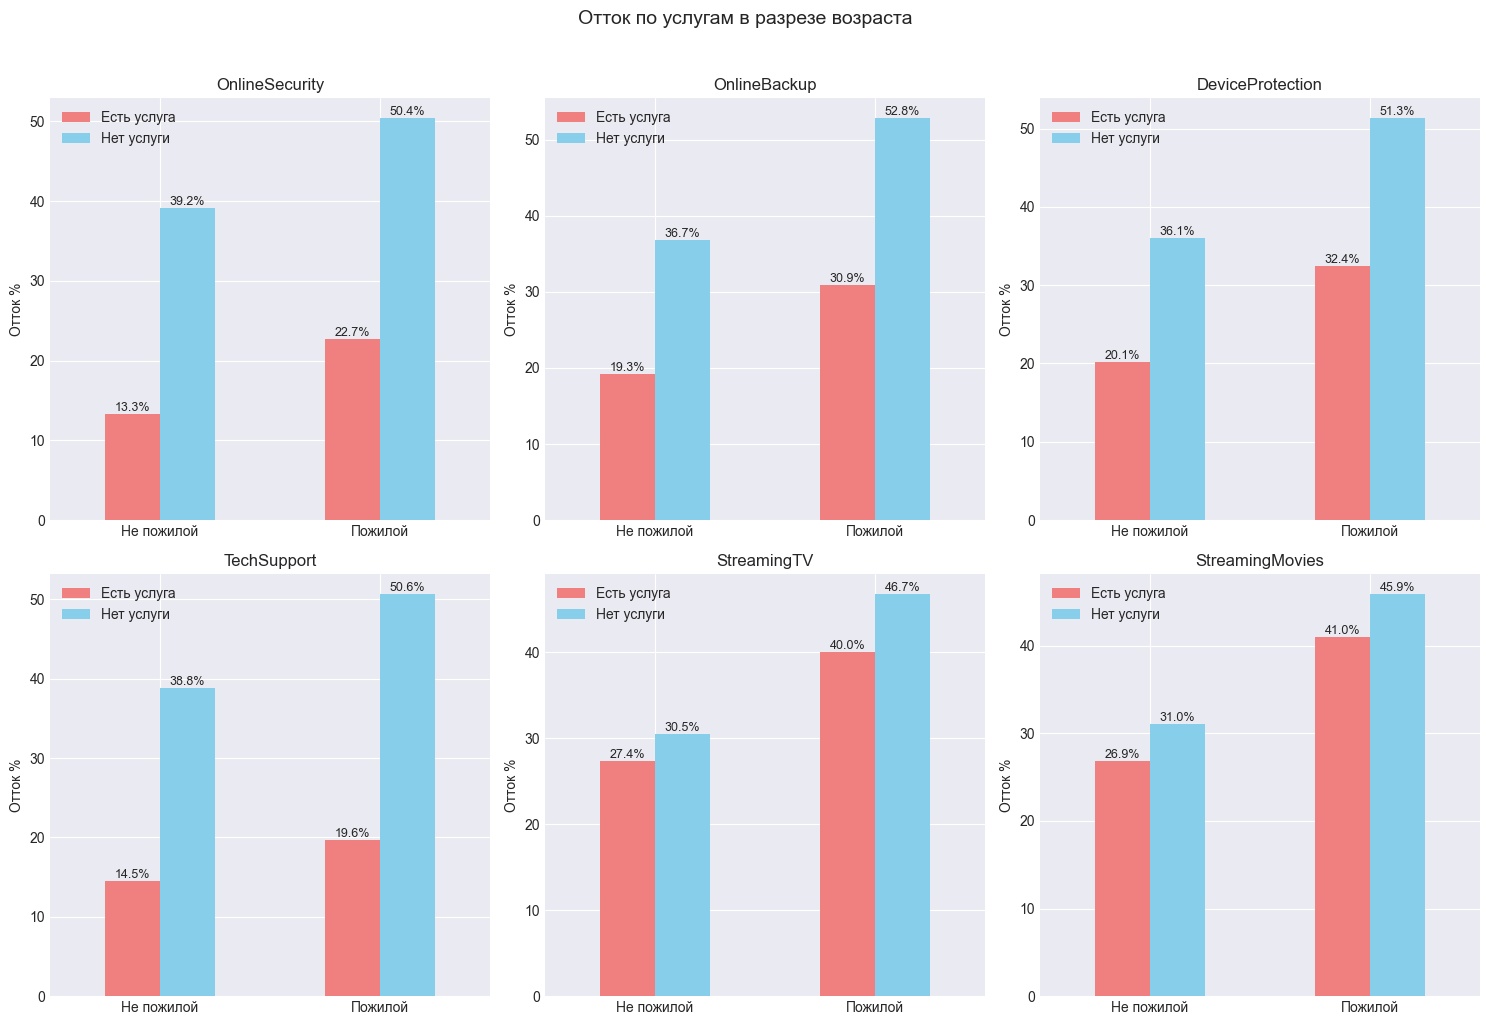

In [42]:
# для визуализации оставаляем только тех, у кого есть интернет
customers_with_internet = df[df['InternetService'] != 'No'].copy()

services = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
            'TechSupport', 'StreamingTV', 'StreamingMovies']

# Подготовка данных для графика
plot_data = []
for service in services:
    for age in [0, 1]:
        for status in ['Yes', 'No']:
            mask = (customers_with_internet['SeniorCitizen'] == age) & \
                   (customers_with_internet[service] == status)
            churn_rate = customers_with_internet.loc[mask, 'Churn'].mean() * 100
            count = mask.sum()

            plot_data.append({
                'Услуга': service,
                'Возраст': 'Пожилой' if age else 'Не пожилой',
                'Статус': 'Есть услуга' if status == 'Yes' else 'Нет услуги',
                'Отток %': churn_rate,
                'Клиентов': count
            })

plot_df = pd.DataFrame(plot_data)

# Создаем графики
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for idx, service in enumerate(services):
    ax = axes[idx]
    data = plot_df[plot_df['Услуга'] == service]

    # Группированная столбчатая диаграмма
    pivot_data = data.pivot(index='Возраст', columns='Статус', values='Отток %')
    pivot_data.plot(kind='bar', ax=ax, color=['lightcoral', 'skyblue'])

    ax.set_title(service, fontsize=12)
    ax.set_ylabel('Отток %')
    ax.set_xlabel('')
    ax.legend(title='')
    ax.tick_params(axis='x', rotation=0)

    # Добавляем значения на столбцы
    for container in ax.containers:
        ax.bar_label(container, fmt='%.1f%%', fontsize=9)

plt.suptitle('Отток по услугам в разрезе возраста', fontsize=14, y=1.02)
plt.tight_layout()
plt.show()

Для пожилых особенно важна тех.поддержка и безопасность -- подключение этих услуг существенно снижает процент оттока, а вот стриминговые фильмы и тв не являются для пользователей чем-то особенным, скорее всего конкуренты могут предложить аналогичные условия.

In [63]:
# Общая статистика
total_by_group = df.groupby('tenure_groups').size().rename('total')

# Ушедшие с PhoneService=1
churned_with_phone = (df[(df['Churn'] == 1) & (df['PhoneService'] == 1)]
                      .groupby('tenure_groups')
                      .size()
                      .rename('churned_with_phone'))

# Собираем все в один DataFrame
result = pd.DataFrame({
    'total': total_by_group,
    'churned_with_phone': churned_with_phone
}).fillna(0).astype(int)

# Добавляем проценты
result['%_of_group'] = (result['churned_with_phone'] / result['total'] * 100).round(1)
result['%_of_churned'] = (result['churned_with_phone'] / result['churned_with_phone'].sum() * 100).round(1)

print("\nСтатистика по tenure_groups для ушедших с PhoneService=1:")
print(result)


Статистика по tenure_groups для ушедших с PhoneService=1:
               total  churned_with_phone  %_of_group  %_of_churned
tenure_groups                                                     
0-4             1238                 605        48.9          35.6
05-09            616                 222        36.0          13.1
10-14            517                 161        31.1           9.5
15-19            436                 125        28.7           7.4
20-24            403                  90        22.3           5.3
25-28            287                  59        20.6           3.5
29-33            342                  75        21.9           4.4
34-38            327                  63        19.3           3.7
39-43            320                  60        18.8           3.5
44-48            318                  41        12.9           2.4
49-52            282                  38        13.5           2.2
53-57            347                  49        14.1           2.9
58-

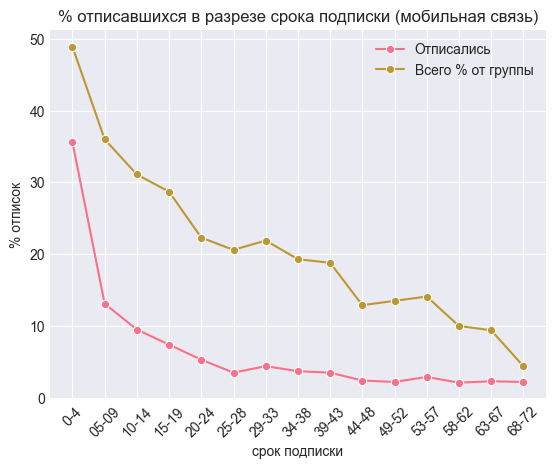

In [71]:
sns.lineplot(result, x='tenure_groups', y='%_of_churned', marker='o', label='Отписались')
sns.lineplot(result, x='tenure_groups', y='%_of_group', marker='o',label='Всего % от группы')
plt.title('% отписавшихся в разрезе срока подписки (мобильная связь)')
plt.legend()
plt.ylabel('% отписок')
plt.xlabel('срок подписки')
plt.xticks(rotation=45)
plt.show();

In [ ]:
# Есть ли у пожилых партнеры/иждивенцы
family_senior = pd.crosstab(
    [df['SeniorCitizen'], df['Partner']],
    df['Churn'],
    normalize='index'
) * 100

print("Отток пожилых в зависимости от наличия партнера (%):")
print(family_senior[1].unstack().round(1))

# Проверяем иждивенцев
dependents_senior = pd.crosstab(
    [df['SeniorCitizen'], df['Dependents']],
    df['Churn'],
    normalize='index'
) * 100

print("\nОтток пожилых в зависимости от наличия иждивенцев (%):")
print(dependents_senior[1].unstack().round(1))

Отток пожилых в зависимости от наличия партнера (%):
Partner           0     1
SeniorCitizen            
0              30.0  16.6
1              48.9  34.6

Отток пожилых в зависимости от наличия иждивенцев (%):
Dependents        0     1
SeniorCitizen            
0              28.1  15.1
1              43.2  24.2


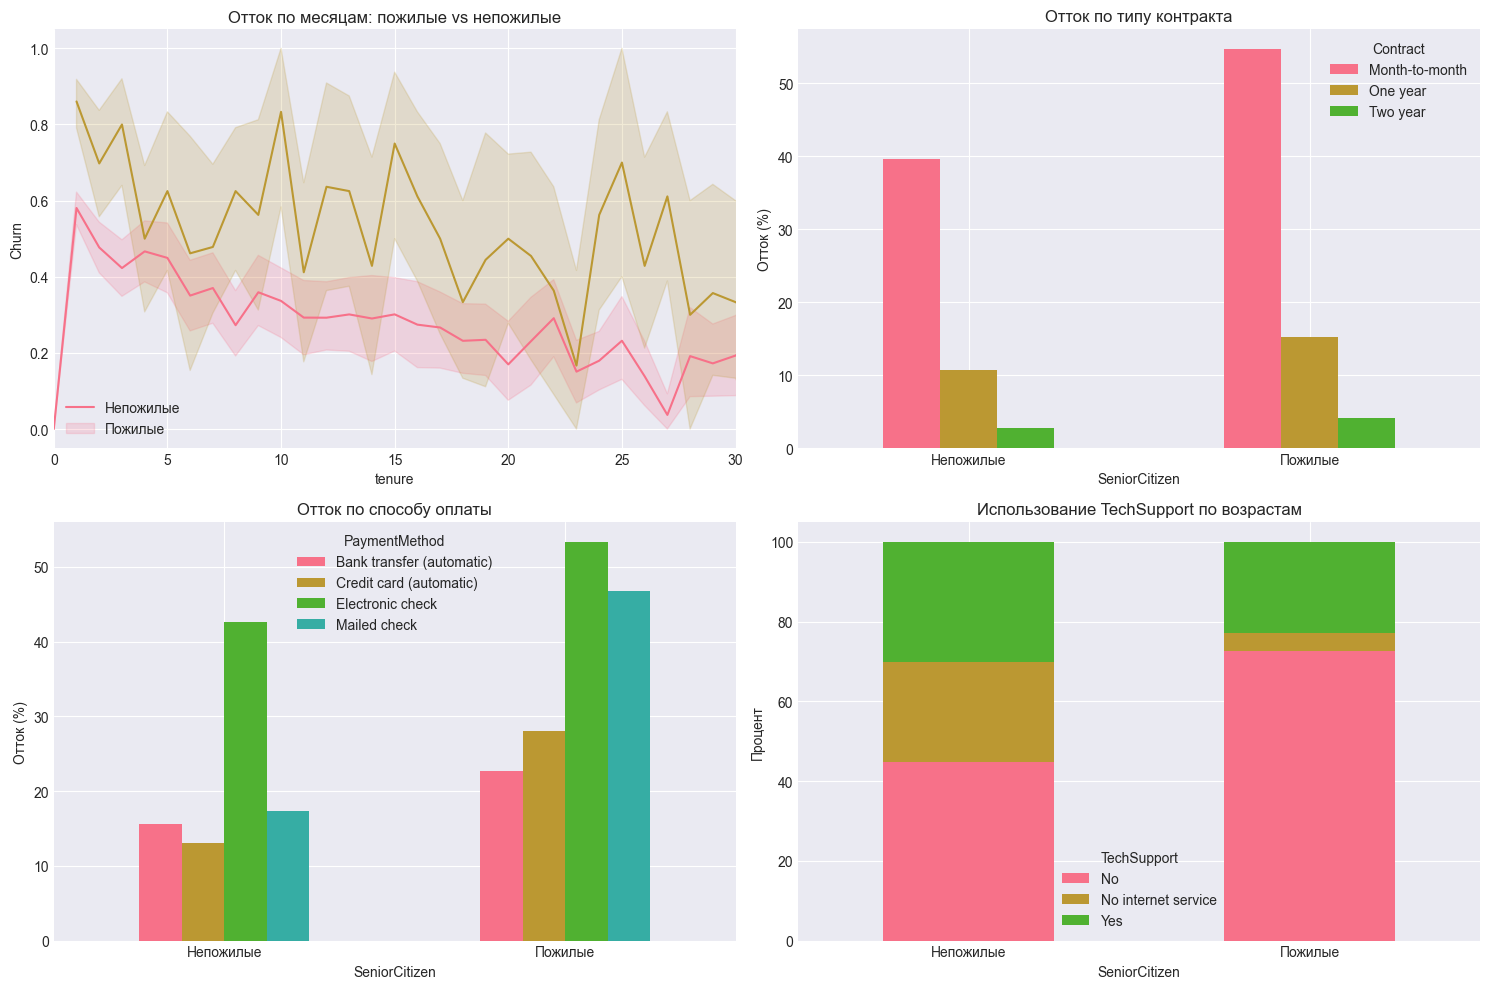

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Отток по месяцам для разных возрастов
sns.lineplot(data=df, x='tenure', y='Churn', hue='SeniorCitizen', ax=axes[0,0])
axes[0,0].set_title('Отток по месяцам: пожилые vs непожилые')
axes[0,0].set_xlim(0, 30)
axes[0,0].legend(['Непожилые', 'Пожилые'])

# Отток по типу контракта для разных возрастов
contract_churn = df.groupby(['SeniorCitizen', 'Contract'])['Churn'].mean().unstack() * 100
contract_churn.plot(kind='bar', ax=axes[0,1])
axes[0,1].set_title('Отток по типу контракта')
axes[0,1].set_ylabel('Отток (%)')
axes[0,1].set_xticklabels(['Непожилые', 'Пожилые'], rotation=0)

# Отток по способу оплаты
payment_churn = df.groupby(['SeniorCitizen', 'PaymentMethod'])['Churn'].mean().unstack() * 100
payment_churn.plot(kind='bar', ax=axes[1,0])
axes[1,0].set_title('Отток по способу оплаты')
axes[1,0].set_ylabel('Отток (%)')
axes[1,0].set_xticklabels(['Непожилые', 'Пожилые'], rotation=0)

# Распределение по услугам (TechSupport)
tech_by_age = pd.crosstab(df['SeniorCitizen'], df['TechSupport'], normalize='index') * 100
tech_by_age.plot(kind='bar', stacked=True, ax=axes[1,1])
axes[1,1].set_title('Использование TechSupport по возрастам')
axes[1,1].set_ylabel('Процент')
axes[1,1].set_xticklabels(['Непожилые', 'Пожилые'], rotation=0)
axes[1,1].legend(title='TechSupport')

plt.tight_layout()
plt.show()

In [ ]:
df1 = df[['tenure_groups', 'MonthlyCharges_groups', 'SeniorCitizen', 'PaymentMethod', 'Contract', 'gender', 'Churn']]\
    .rename(columns={
    'tenure_groups': 'срок_подписки', 'MonthlyCharges_groups': 'ежемес.платеж',
    'SeniorCitizen': 'пожилые', 'PaymentMethod': 'способ_оплаты',
    'Contract': 'срок_договора', 'gender': 'пол', 'Churn': 'отток'
})
df1

,срок_подписки,ежемес.платеж,пожилые,способ_оплаты,срок_договора,пол,отток
0,0-4,25-31,0,Electronic check,Month-to-month,Female,0
1,34-38,51-58,0,Mailed check,One year,Male,0
2,0-4,51-58,0,Mailed check,Month-to-month,Male,1
3,44-48,38-45,0,Bank transfer (automatic),One year,Male,0
4,0-4,65-71,0,Electronic check,Month-to-month,Female,1
...,...,...,...,...,...,...,...
7038,20-24,78-85,0,Mailed check,One year,Male,0
7039,68-72,98-105,0,Credit card (automatic),One year,Female,0
7040,10-14,25-31,0,Electronic check,Month-to-month,Female,0
7041,0-4,71-78,1,Mailed check,Month-to-month,Male,1


In [ ]:
# Создаем сводную таблицу, чтобы выявить, на каком сроке чаще всего отписываются
pivot = pd.pivot_table(
    df1,
    values='отток',
    index='срок_подписки',
    aggfunc=['sum', 'count', lambda x: (x.sum() / len(x) * 100).round(2)]
)

# Переименовываем колонки для понятности
pivot.columns = ['сумма_оттока', 'всего_подписок', 'доля_оттока_%']
print(pivot)

               сумма_оттока  всего_подписок  доля_оттока_%
срок_подписки                                             
0-4                     680            1238          54.93
05-09                   243             616          39.45
10-14                   176             517          34.04
15-19                   134             436          30.73
20-24                    98             403          24.32
25-28                    63             287          21.95
29-33                    80             342          23.39
34-38                    65             327          19.88
39-43                    70             320          21.88
44-48                    47             318          14.78
49-52                    41             282          14.54
53-57                    54             347          15.56
58-62                    38             349          10.89
63-67                    40             415           9.64
68-72                    40             846           4.

In [ ]:
# Создаем сводную таблицу в разрезе способов оплаты
pivot2 = pd.pivot_table(
    df1,
    values='отток',
    index='способ_оплаты',
    aggfunc=['sum', 'count', lambda x: (x.sum() / len(x) * 100).round(2)]
)

# Переименовываем колонки для понятности
pivot2.columns = ['сумма_оттока', 'всего_подписок', 'доля_оттока_%']
print(pivot2)

                           сумма_оттока  всего_подписок  доля_оттока_%
способ_оплаты                                                         
Bank transfer (automatic)           258            1544          16.71
Credit card (automatic)             232            1522          15.24
Electronic check                   1071            2365          45.29
Mailed check                        308            1612          19.11


In [ ]:
# Создаем сводную таблицу в разрезе типа продления договора
pivot3 = pd.pivot_table(
    df1,
    values='отток',
    index='срок_договора',
    aggfunc=['sum', 'count', lambda x: (x.sum() / len(x) * 100).round(2)]
)

# Переименовываем колонки для понятности
pivot3.columns = ['сумма_оттока', 'всего_подписок', 'доля_оттока_%']
print(pivot3)

                сумма_оттока  всего_подписок  доля_оттока_%
срок_договора                                              
Month-to-month          1655            3875          42.71
One year                 166            1473          11.27
Two year                  48            1695           2.83


In [ ]:
# Создаем сводную таблицу в разрезе возраста
pivot4 = pd.pivot_table(
    df1,
    values='отток',
    index='пожилые',
    aggfunc=['sum', 'count', lambda x: (x.sum() / len(x) * 100).round(2)]
)

# Переименовываем колонки для понятности
pivot4.columns = ['сумма_оттока', 'всего_подписок', 'доля_оттока_%']
print(pivot4)

         сумма_оттока  всего_подписок  доля_оттока_%
пожилые                                             
0                1393            5901          23.61
1                 476            1142          41.68
